# PiML Toolbox: Results Return

This example notebook demonstrates how to use PiML to save a fitted model to pickle file and load a pickle file into PiLM workflow.

# Install PiML package on Google Colab

1. Run `!pip install piml` to install the latest version of PiML
2. In Colab, you'll need restart the runtime in order to use newly installed PiML version.

In [1]:
!pip install piml

# Stage 1: Initialize an experiment, Load and Prepare data

In [1]:
from piml import Experiment
exp = Experiment()
exp.data_loader(data="BikeSharing")

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0000,16.0
1,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,40.0
2,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,32.0
3,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,13.0
4,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1.0,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,119.0
17375,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,89.0
17376,1.0,1.0,12.0,21.0,0.0,1.0,1.0,1.0,0.26,0.2576,0.60,0.1642,90.0
17377,1.0,1.0,12.0,22.0,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,61.0


In [2]:
exp.data_summary()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

HTML(value='<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.…

In [3]:
exp.data_prepare()

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

# Stage 2. Train intepretable models 

In [4]:
from piml.models import GLMRegressor, XGB2Regressor

exp.model_train(model=GLMRegressor(), name='GLM')
exp.model_train(XGB2Regressor(), name="XGB2")

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

# Stage 3. Model interpret, explain diagnostics with results return

Return figure and/or data results for each high-code API, triggered by `return_data=True`.

The returned object has two attributes, i.e., `data` and `figure`.

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

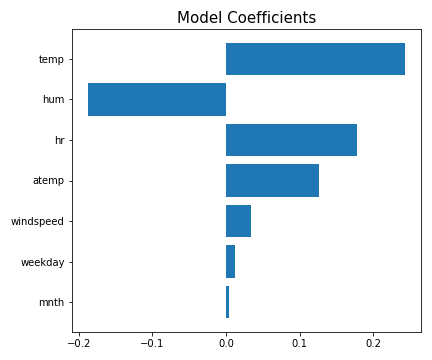

In [5]:
result = exp.model_interpret(model="GLM", show="glm_coef_plot", centered=True, return_data=True,
                             original_scale=True, figsize=(6, 5))

In [6]:
result.data

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,Feature Name,Coefficient
17,atemp,1.265512e-01
3,holiday_0,2.775558e-17
11,holiday_1,-2.791845e-02
18,hr,1.786579e-01
19,hum,-1.879556e-01
6,mnth,3.941489e-03
0,season_0,0.000000e+00
10,season_1,2.026964e-02
8,season_2,-6.915606e-03
15,season_3,6.422956e-02


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

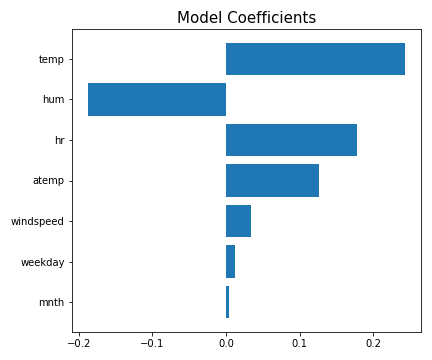

In [7]:
result.figure

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

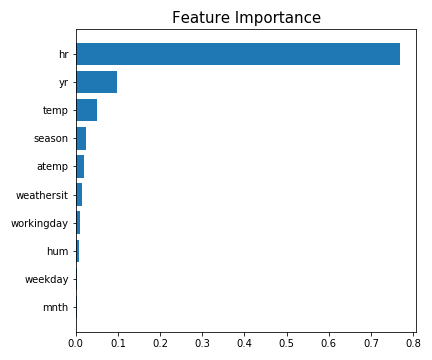

In [8]:
result = exp.model_interpret(model="XGB2", show="global_fi", return_data=True,
                             original_scale=True, figsize=(6, 5))

In [9]:
result.data

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,Feature Name,Importance
0,holiday,0.000332
1,windspeed,0.001400
2,mnth,0.002148
3,weekday,0.002495
4,hum,0.008662
5,workingday,0.010984
6,weathersit,0.015306
7,atemp,0.018995
8,season,0.023035
9,temp,0.049240


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

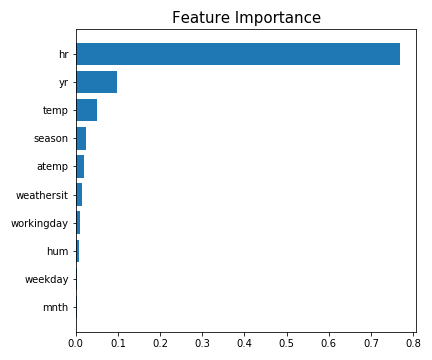

In [10]:
result.figure

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

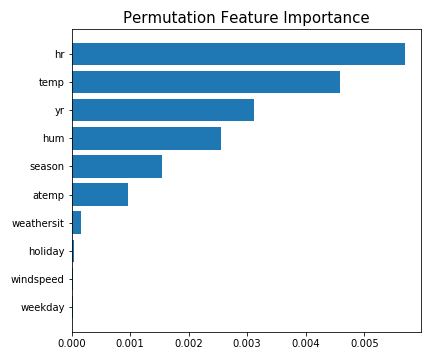

In [11]:
result = exp.model_explain(model="GLM", show="pfi", centered=True, return_data=True,
                           original_scale=True, figsize=(6, 5))

In [12]:
result.data

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,Feature Name,Importance
0,workingday,0.000002
1,mnth,0.000005
2,weekday,0.000030
3,windspeed,0.000031
4,holiday,0.000032
5,weathersit,0.000157
6,atemp,0.000965
7,season,0.001547
8,hum,0.002555
9,yr,0.003122


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

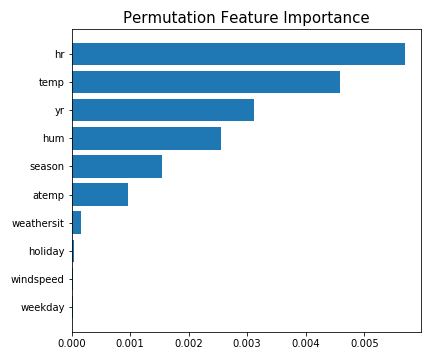

In [13]:
result.figure

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

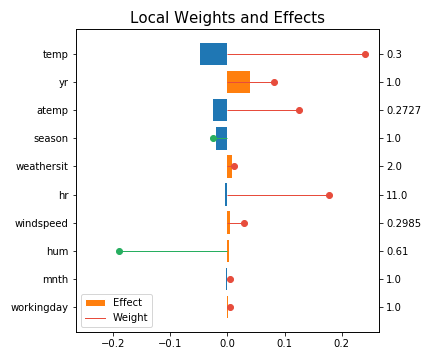

In [14]:
result = exp.model_explain(model="GLM", show="lime", centered=True, return_data=True,
                             original_scale=True, figsize=(6, 5))

In [15]:
result.data

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,Feature Name,Effect,Weight
0,weekday,-0.000020,0.013026
1,holiday,0.000824,0.028505
2,workingday,0.001299,0.004119
3,mnth,-0.001855,0.003693
4,hum,0.003095,-0.190109
5,windspeed,0.003668,0.028872
6,hr,-0.004117,0.177792
7,weathersit,0.007880,0.010626
8,season,-0.019233,-0.025505
9,atemp,-0.025516,0.125023


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

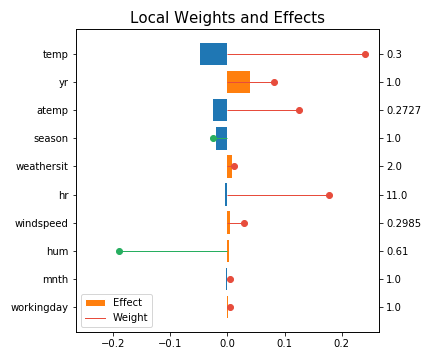

In [16]:
result.figure

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

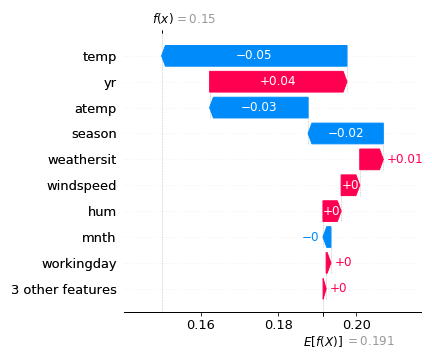

In [17]:
result = exp.model_explain(model="GLM", show="shap_waterfall", centered=True, return_data=True,
                           original_scale=True, figsize=(6, 5))

In [18]:
result.data

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,Feature Name,Effect
0,season,-0.019362
1,yr,0.035358
2,mnth,-0.002053
3,hr,0.000544
4,holiday,0.000838
5,weekday,-0.000589
6,workingday,0.001228
7,weathersit,0.006061
8,temp,-0.047726
9,atemp,-0.025351


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

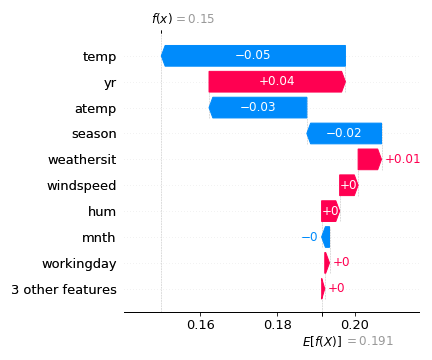

In [19]:
result.figure

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

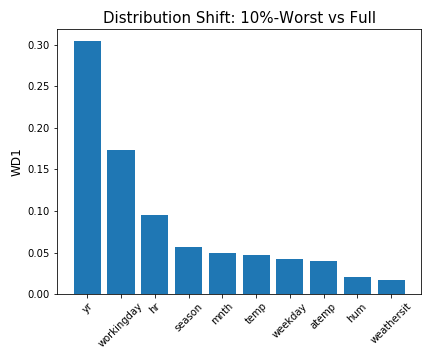

In [20]:
result = exp.model_diagnose(model="XGB2", show="resilience_distance", return_data=True, slice_features=["hr"],
                            distance_metric="WD1", original_scale=True, figsize=(6, 5))

In [21]:
result.data

HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

,Feature Name,WD1
0,yr,0.3038
1,workingday,0.1732
2,hr,0.0946
3,season,0.0563
4,mnth,0.0490
5,temp,0.0469
6,weekday,0.0424
7,atemp,0.0394
8,hum,0.0205
9,weathersit,0.0171


HTML(value='\n        <style>\n\n        .left-label {\n            width: 30%;\n        }\n\n        .card-pa…

<IPython.core.display.Javascript object>

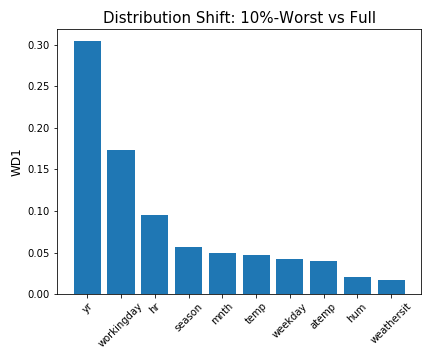

In [22]:
result.figure